#### Problem Satement:-

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is 
one of the markets which is one of the major contributors in the world's economy.
It is a very large market and there are various companies working in the domain.
Data Science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. 
The company uses data analytics to purchase houses at a price below their actual values and flio them at a higher price.
For the same purpose, the company has collected a data set from the sale of houses in Australia.

The data is provided in the CSV file below. The company is looking at prespective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual  value of the prospective properties and decide whether to invest in them or not.
How do these variables describe the price of the house?

#### Business Goal:

You are required to model the price of houses with the availble Independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordinlgy manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

#### Technical Requirements:

Data contains 1460 entries each having 81 variables.
Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
Extensive EDA has to be performed to gain relationships of important variable and price
Data contains numerical as well as categorical variable. You need to handle them accordingly.
You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters.
You have to find important features which afffect the price positively or negatively.

#### Importing all the Libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.pandas.set_option('display.max_columns',None) # Display all the columns

In [2]:
# loading Dataset
df = pd.read_csv('train.csv')

In [3]:
df.shape

(1168, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [5]:
# First 10 rows
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
5,1197,60,RL,58.0,14054,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,879,879,GasA,Ex,Y,SBrkr,879,984,0,1863,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2006.0,Fin,3,660,TA,TA,Y,100,17,0,0,0,0,NaN,NaN,NaN,0,11,2006,New,Partial,219210
6,561,20,RL,NaN,11341,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1957,1996,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,Gd,TA,No,ALQ,1302,Unf,0,90,1392,GasA,TA,Y,SBrkr,1392,0,0,1392,1,0,1,1,3,1,TA,5,Mod,1,Gd,Detchd,1957.0,Unf,2,528,TA,TA,Y,0,0,0,0,95,0,NaN,NaN,NaN,0,5,2010,WD,Normal,121500
7,1041,20,RL,88.0,13125,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,4,1957,2000,Gable,CompShg,Wd Sdng,Wd Sdng,BrkCmn,67.0,TA,TA,CBlock,TA,TA,No,Rec,168,BLQ,682,284,1134,GasA,Ex,Y,SBrkr,1803,0,0,1803,1,0,2,0,3,1,TA,8,Maj1,1,TA,Attchd,1957.0,RFn,2,484,TA,TA,Y,0,0,0,0,0,0,NaN,GdPrv,NaN,0,1,2006,WD,Normal,155000
8,503,20,RL,70.0,9170,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,1Story,5,7,1965,1965,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,698,GLQ,96,420,1214,GasA,Ex,Y,SBrkr,1214,0,0,1214,1,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1965.0,Unf,2,461,Fa,Fa,Y,0,0,184,0,0,0,NaN,GdPrv,Shed,400,4,2007,WD,Normal,140000
9,576,50,RL,80.0,8480,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1.5Fin,5,5,1947,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,442,Unf,0,390,832,Gas

One Observation here is that a lot of variables have been labelled at NaN, but they are actually not null values and have certain meaning.

For Example,
NA in feature 'Alley' means No_Alley

in case of PoolIQC, NA means 'No Pool' (*Refer Data Description at the end of thhe notebook)

I'm replacing them with actual variables before gping further!

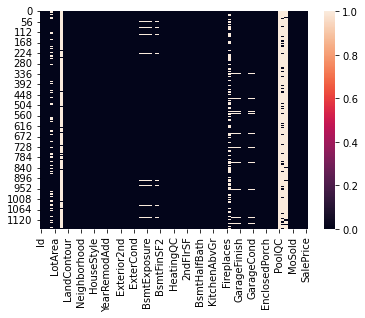

PoolQC          0.994007
MiscFeature     0.962329
Alley           0.934075
Fence           0.797089
FireplaceQu     0.471747
LotFrontage     0.183219
GarageYrBlt     0.054795
GarageFinish    0.054795
GarageType      0.054795
GarageQual      0.054795
GarageCond      0.054795
BsmtExposure    0.026541
BsmtFinType2    0.026541
BsmtQual        0.025685
BsmtCond        0.025685
BsmtFinType1    0.025685
MasVnrType      0.005993
MasVnrArea      0.005993
Id              0.000000
Functional      0.000000
dtype: float64

In [6]:
#Identifying the null values

sns.heatmap(df.isnull())
plt.show()
#Let's see the top 20 features with null values
(df.isnull().sum()/len(df.index)).sort_values(ascending=False).head(20)

#### First let us handle Categorical features which are missing: based on domain knowledge and given explanation.

In [7]:
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))
    

Alley: 0.9341% missing values
MasVnrType: 0.006% missing values
BsmtQual: 0.0257% missing values
BsmtCond: 0.0257% missing values
BsmtExposure: 0.0265% missing values
BsmtFinType1: 0.0257% missing values
BsmtFinType2: 0.0265% missing values
FireplaceQu: 0.4717% missing values
GarageType: 0.0548% missing values
GarageFinish: 0.0548% missing values
GarageQual: 0.0548% missing values
GarageCond: 0.0548% missing values
PoolQC: 0.994% missing values
Fence: 0.7971% missing values
MiscFeature: 0.9623% missing values


In [8]:
# As per given definition, NA means No Pool. Let's replace NAs with 'No_Pool' 'No_Pool'
df['PoolQC'].fillna('No_Pool',inplace=True)
print(df['PoolQC'].value_counts())

#As per given definition, NA means None. Let's replace NAs with 'None'
df['MiscFeature'].fillna('None',inplace=True)
print(df['MiscFeature'].value_counts())

#As per given definition, NA means No_alley_access. Let's replace NAs with 'No_alley_access'
df['Alley'].fillna('No_alley_access',inplace=True)
print(df['Alley'].value_counts())


# As per given definition, NA means No_Fence. Let's replace NAs with 'No_Fence'
df['Fence'].fillna('No_Fence',inplace=True)
print(df['Fence'].value_counts())

# As per given definition, NA means No_Fireplace. Let's replace NAs with 'No_Fireplace'
df['FireplaceQu'].fillna('No_Fireplace',inplace=True)
print(df['FireplaceQu'].value_counts())

basement=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
# As per given definition, NA means No_Basement. Let's replace NAs with 'No_Basement'
for i in basement:
    df[i].fillna('No_Basement',inplace=True)
    print(df[i].value_counts())

garage=['GarageType','GarageFinish','GarageQual','GarageCond']
for i in garage:
    print(df[i].value_counts())
    
#As per given defintion, NA means No_Garage (Refer variable Description at the end of the notebook)
for i in garage:
    df[i].fillna('No_Garage',inplace=True)
    print(df[i].value_counts())

No_Pool    1161
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64
None    1124
Shed      40
Gar2       2
TenC       1
Othr       1
Name: MiscFeature, dtype: int64
No_alley_access    1091
Grvl                 41
Pave                 36
Name: Alley, dtype: int64
No_Fence    931
MnPrv       129
GdPrv        51
GdWo         47
MnWw         10
Name: Fence, dtype: int64
No_Fireplace    551
Gd              301
TA              252
Fa               25
Ex               21
Po               18
Name: FireplaceQu, dtype: int64
TA             517
Gd             498
Ex              94
No_Basement     30
Fa              29
Name: BsmtQual, dtype: int64
TA             1041
Gd               56
Fa               39
No_Basement      30
Po                2
Name: BsmtCond, dtype: int64
No             756
Av             180
Gd             108
Mn              93
No_Basement     31
Name: BsmtExposure, dtype: int64
Unf            345
GLQ            330
ALQ            174
BLQ            121


Replacing all other categorical missing values with a new label 'Missing' although only 1 is left - 'MasVnrType

In [9]:
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data
df=replace_cat_feature(df,features_nan)

df[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [10]:
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

In [11]:
df.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168
unique,5,2,3,4,4,1,5,3,25,9,8,5,8,6,8,14,15,5,4,5,6,5,5,5,7,7,6,5,2,5,4,7,6,7,4,6,6,3,4,5,5,9,6
top,RL,Pave,No_alley_access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,No_Fireplace,Attchd,Unf,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
freq,928,1164,1091,740,1046,1168,842,1105,182,1005,1154,981,578,915,1144,396,387,696,717,1022,516,517,1041,756,345,1002,1143,585,1090,1070,578,1085,551,691,487,1050,1061,1071,1161,931,1124,999,945


In [12]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1104.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1978.193841,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,24.890704,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
print("Id of Houses ",len(df['Id']))
df.drop('Id',axis=1,inplace=True)

Id of Houses  1168


#### Numerical Variables

In [14]:
# List of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ',len(numerical_features))

#visualise the numerical variables
df[numerical_features].head()


Number of numerical variables:  37


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,120,NaN,4928,6,5,1976,1976,0.0,120,0,958,1078,958,0,0,958,0,0,2,0,2,1,5,1,1977.0,2,440,0,205,0,0,0,0,0,2,2007,128000
1,20,95.0,15865,8,6,1970,1970,0.0,351,823,1043,2217,2217,0,0,2217,1,0,2,0,4,1,8,1,1970.0,2,621,81,207,0,0,224,0,0,10,2007,268000
2,60,92.0,9920,7,5,1996,1997,0.0,862,0,255,1117,1127,886,0,2013,1,0,2,1,3,1,8,1,1997.0,2,455,180,130,0,0,0,0,0,6,2007,269790
3,20,105.0,11751,6,6,1977,1977,480.0,705,0,1139,1844,1844,0,0,1844,0,0,2,0,3,1,7,1,1977.0,2,546,0,122,0,0,0,0,0,1,2010,190000
4,20,NaN,16635,6,7,1977,2000,126.0,1246,0,356,1602,1602,0,0,1602,0,1,2,0,3,1,8,1,1977.0,2,529,240,0,0,0,0,0,0,6,2009,215000


#### Year Features

In [15]:
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [16]:
for feature in year_feature:
    print(feature,df[feature].unique())

YearBuilt [1976 1970 1996 1977 2006 1957 1965 1947 1937 2003 1960 1955 1923 1930
 2007 2001 1972 1950 1961 1953 1918 2010 1922 1934 2005 1946 1941 1948
 1975 1978 1956 2004 1982 2000 2002 1920 1992 1936 1967 1989 1929 1968
 1959 1935 1966 1931 1916 1998 1962 1974 1926 1904 1995 1969 1985 1963
 1958 1892 2008 1971 1980 1945 1986 1981 1949 1940 1954 1925 1915 1921
 1924 1999 1951 1993 1964 1900 1919 1910 1938 1880 1988 1911 1990 1979
 1927 1983 1994 2009 1928 1917 1898 1997 1984 1973 1952 1939 1987 1890
 1942 1991 1932 1908 1914 1882 1905 1875 1906 1893 1912 1913]
YearRemodAdd [1976 1970 1997 1977 2000 2006 1996 1965 1950 2003 1960 1955 2007 2001
 1961 1998 1953 2010 1995 2005 1992 1975 1978 1982 2002 1989 1967 1968
 1959 2004 1966 2008 1987 1981 1969 1985 1963 1991 1993 1971 1990 1956
 1986 1999 1954 1957 1994 1972 1958 1980 1979 1951 1983 2009 1962 1964
 1952 1984 1988 1974 1973]
GarageYrBlt [1977. 1970. 1997. 2006. 1957. 1965. 1947. 1937. 2003. 1974. 1955. 1923.
 2002. 2007. 1987. 200

Text(0.5, 1.0, 'Mean House Price vs YearSold')

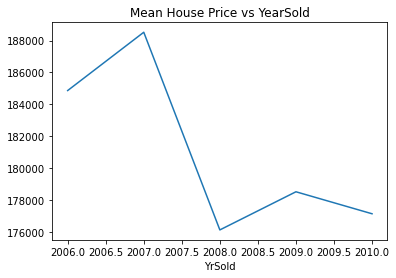

In [17]:
df.groupby('YrSold')['SalePrice'].mean().plot()
plt.title("Mean House Price vs YearSold")

There seems to ve a peak in House Prices, but a sharp drop in between 2007 to 2008. 

This can be due to Economic Crash. "Economies worldwide slowed during this period since credit tightened and international trade declined.

Housing markets suffered and unemployment soared, resulting in evictions and forecloaures.

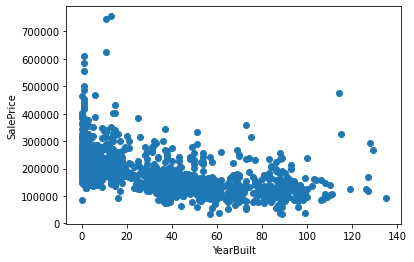

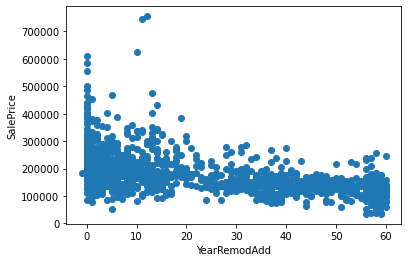

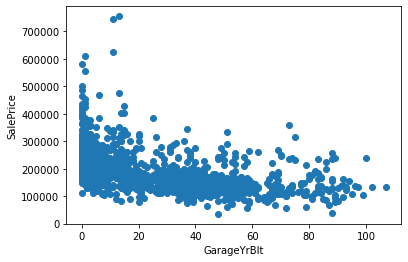

In [18]:
for feature in year_feature:
    if feature!='YrSold':
        data=df.copy()
        data[feature]=data['YrSold']-data[feature]
        
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

Obs 1: the Houses built recently have Higher Sales Price.Obs 1: The Houses built recently have Higher Sales Price.
Obs 2: The Houses remodelled recently have Higher Sales Price.
Obs 3: The Houses whose Garages were built recently have Higher Sales Price 

#### Identifying Discrete Variables

In [19]:
discrete_feature=[feature for feature in numerical_features
                  if len(df[feature].unique())<25 and
                  feature not in year_feature]
print("Count of Discrete Variables is:",len(discrete_feature))

Count of Discrete Variables is: 17


In [20]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [21]:
df[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,120,6,5,0,0,0,2,0,2,1,5,1,2,0,0,0,2
1,20,8,6,0,1,0,2,0,4,1,8,1,2,0,0,0,10
2,60,7,5,0,1,0,2,1,3,1,8,1,2,0,0,0,6
3,20,6,6,0,0,0,2,0,3,1,7,1,2,0,0,0,1
4,20,6,7,0,0,1,2,0,3,1,8,1,2,0,0,0,6


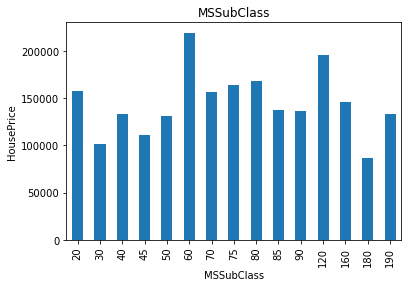

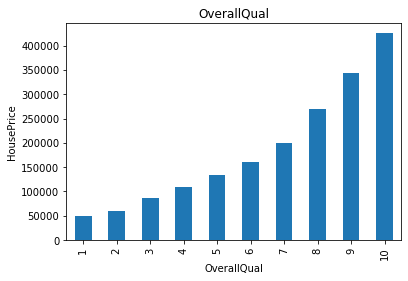

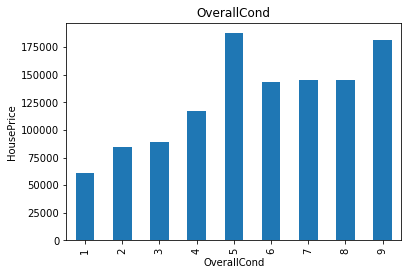

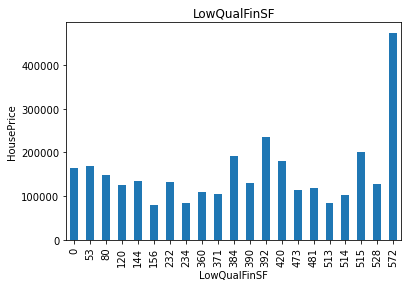

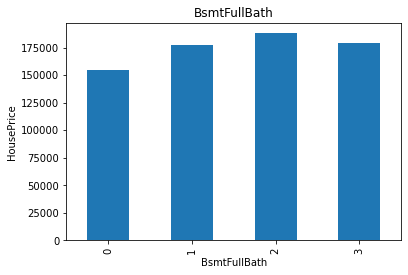

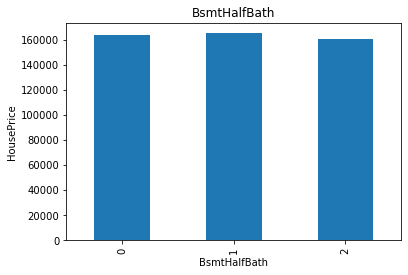

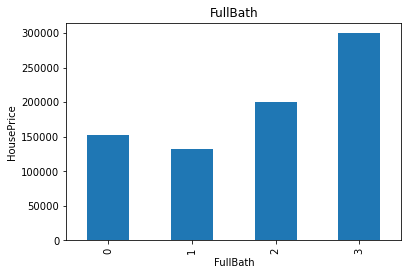

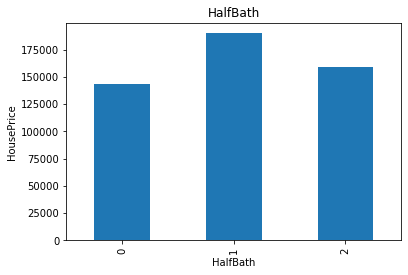

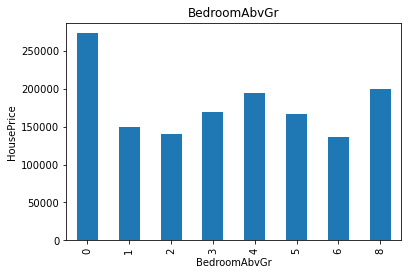

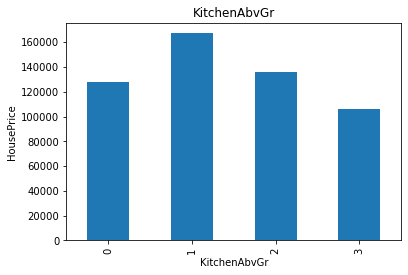

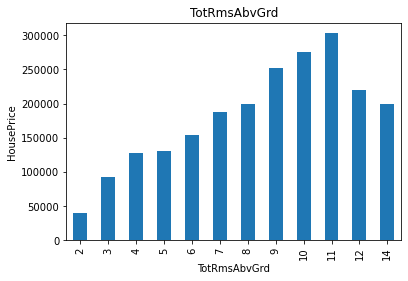

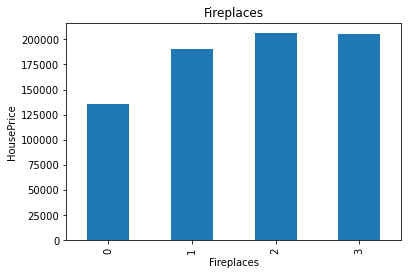

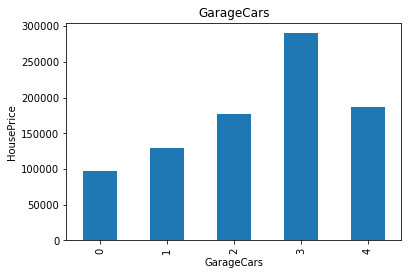

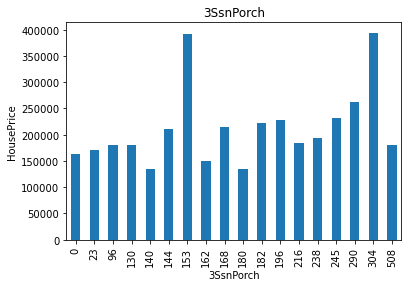

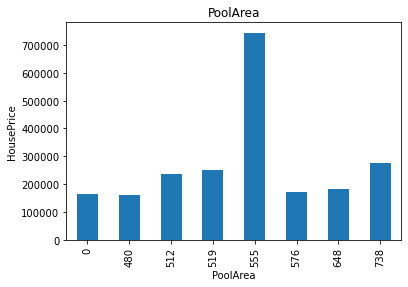

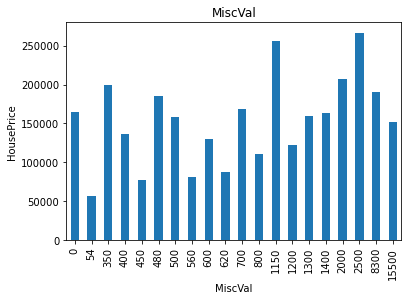

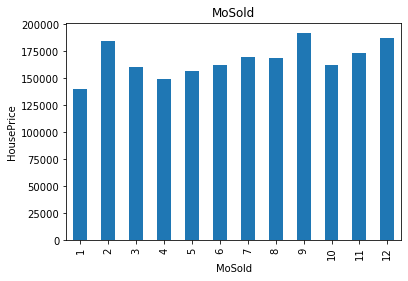

In [22]:
for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('HousePrice')
    plt.title(feature)
    plt.show()

#### Identifying Continuous Features

In [23]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count" ,len(continuous_feature))

Continuous feature Count 16


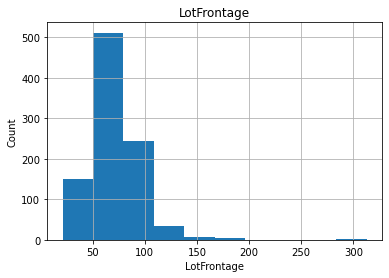

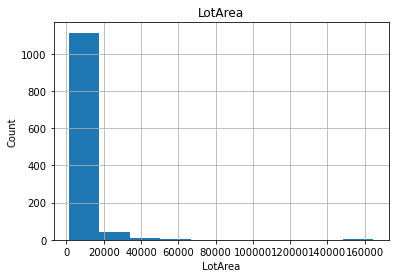

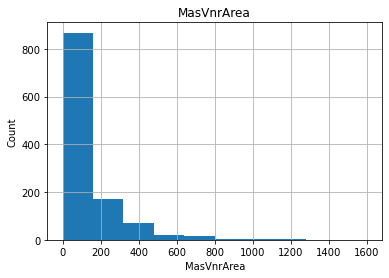

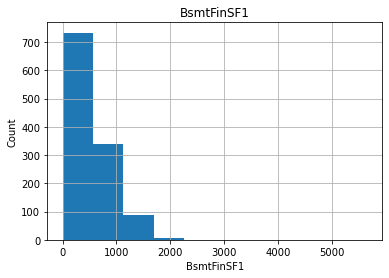

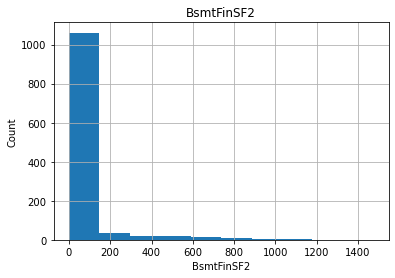

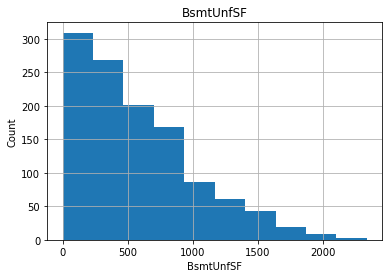

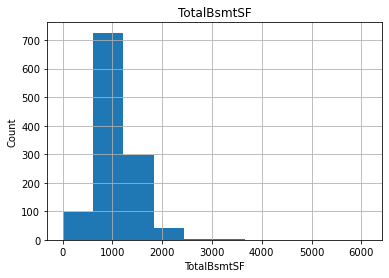

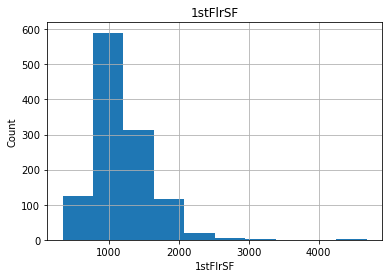

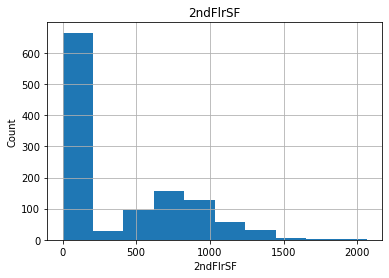

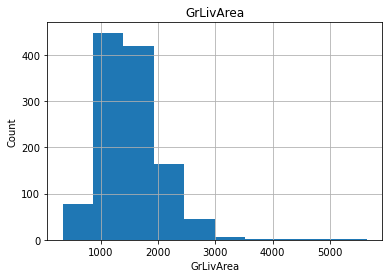

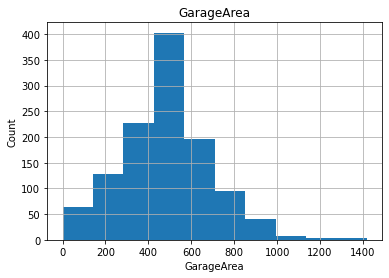

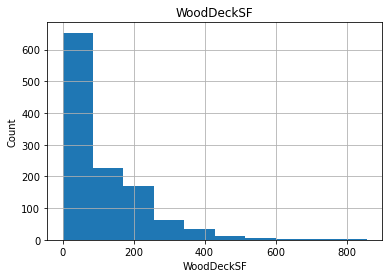

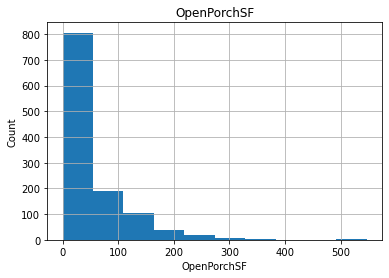

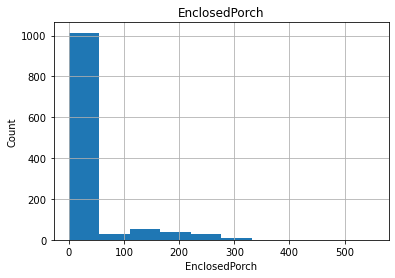

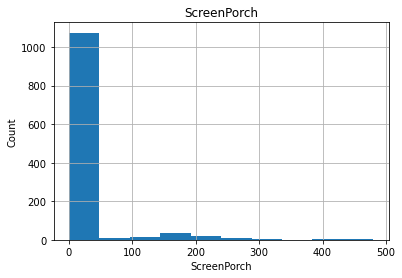

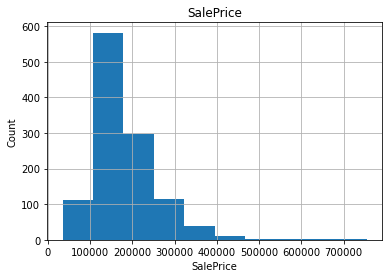

In [25]:
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist()
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

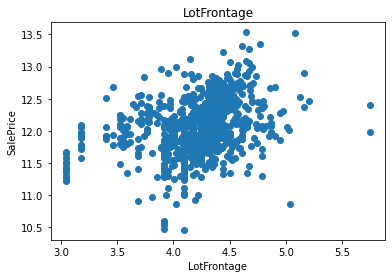

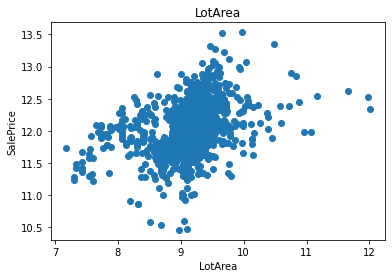

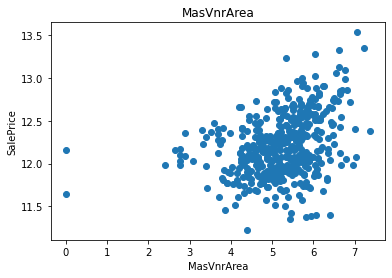

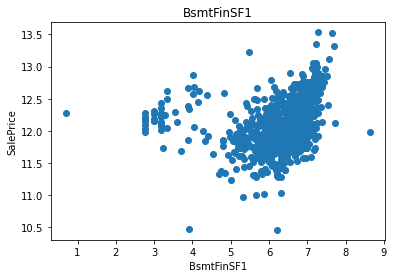

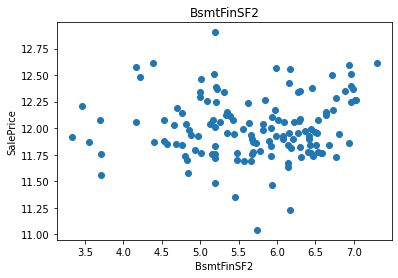

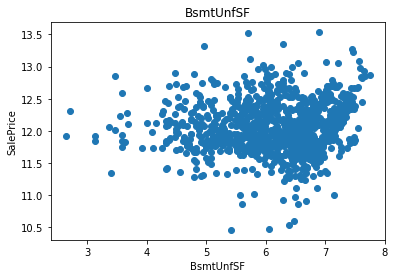

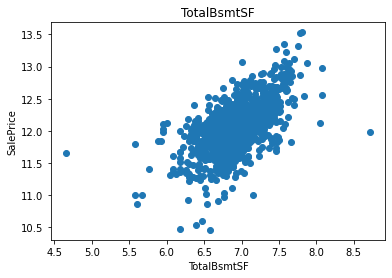

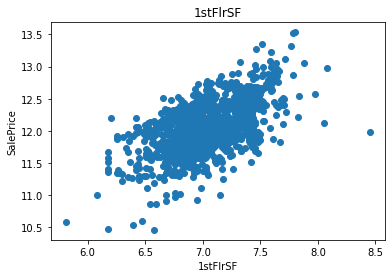

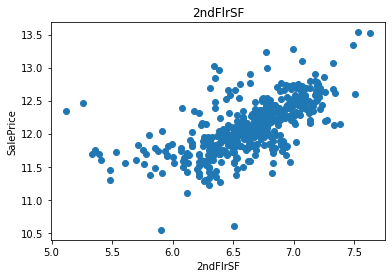

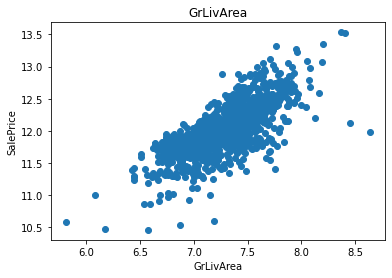

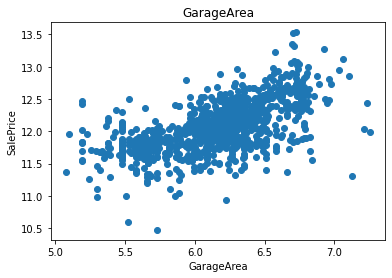

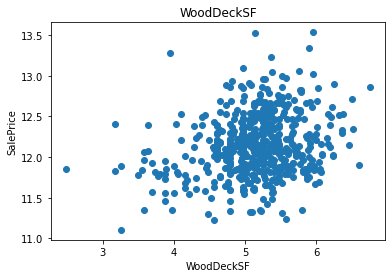

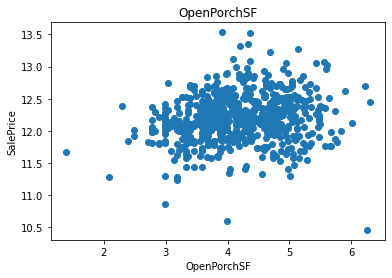

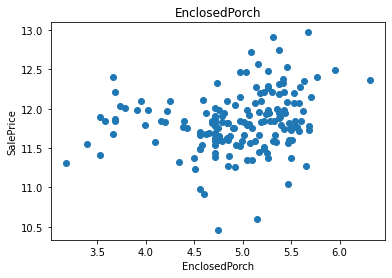

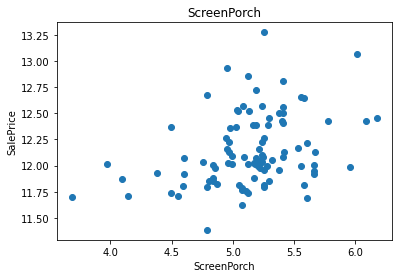

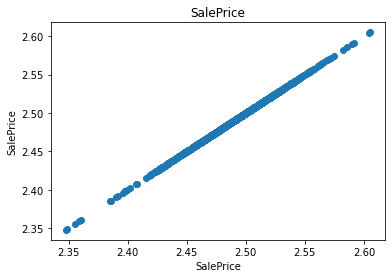

In [26]:
# As clear from above a lot of features are not normally distributed. Let's do Log Transformation

for feature in continuous_feature:
    data=df.copy()
    data[feature]=np.log(data[feature])
    data['SalePrice']=np.log(data['SalePrice'])
    plt.scatter(data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

#### Categorical Features

In [27]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,No_alley_access,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,Gd,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
1,RL,Pave,No_alley_access,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,Gd,Gd,PConc,TA,Gd,Gd,ALQ,Rec,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,Unf,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
2,RL,Pave,No_alley_access,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,Unf,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
3,RL,Pave,No_alley_access,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Plywood,Plywood,BrkFace,TA,TA,CBlock,Gd,TA,No,BLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,No_Pool,MnPrv,None,COD,Normal
4,RL,Pave,No_alley_access,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,CemntBd,CmentBd,Stone,Gd,TA,CBlock,Gd,TA,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,TA,Attchd,Fin,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal


In [28]:
for feature in categorical_features:
    print('{} has {} categories'.format(feature,len(df[feature].unique())))

MSZoning has 5 categories
Street has 2 categories
Alley has 3 categories
LotShape has 4 categories
LandContour has 4 categories
Utilities has 1 categories
LotConfig has 5 categories
LandSlope has 3 categories
Neighborhood has 25 categories
Condition1 has 9 categories
Condition2 has 8 categories
BldgType has 5 categories
HouseStyle has 8 categories
RoofStyle has 6 categories
RoofMatl has 8 categories
Exterior1st has 14 categories
Exterior2nd has 15 categories
MasVnrType has 5 categories
ExterQual has 4 categories
ExterCond has 5 categories
Foundation has 6 categories
BsmtQual has 5 categories
BsmtCond has 5 categories
BsmtExposure has 5 categories
BsmtFinType1 has 7 categories
BsmtFinType2 has 7 categories
Heating has 6 categories
HeatingQC has 5 categories
CentralAir has 2 categories
Electrical has 5 categories
KitchenQual has 4 categories
Functional has 7 categories
FireplaceQu has 6 categories
GarageType has 7 categories
GarageFinish has 4 categories
GarageQual has 6 categories
Garag

Feature neighborhood contains 25 categories.


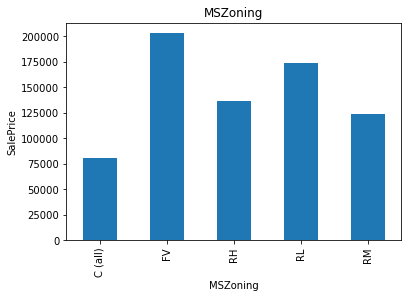

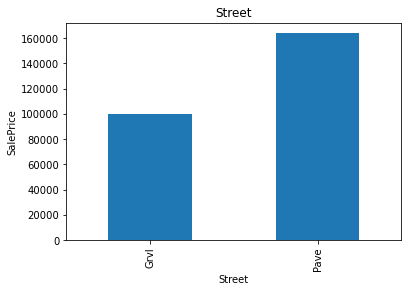

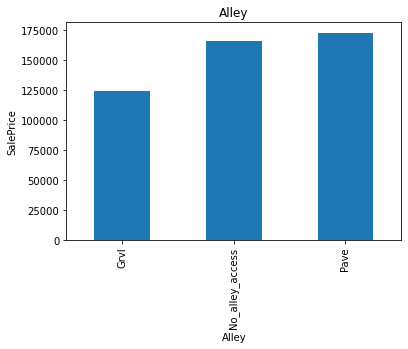

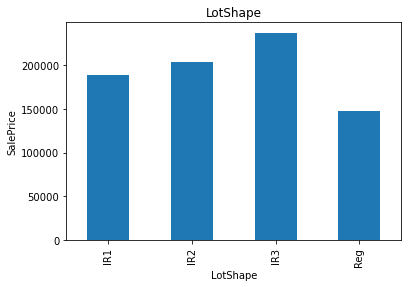

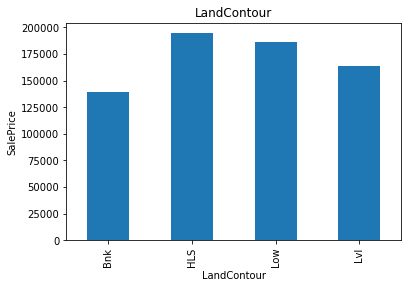

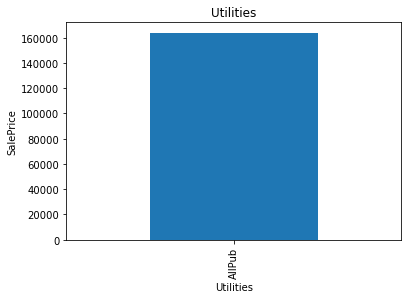

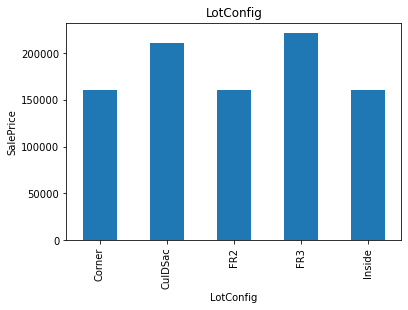

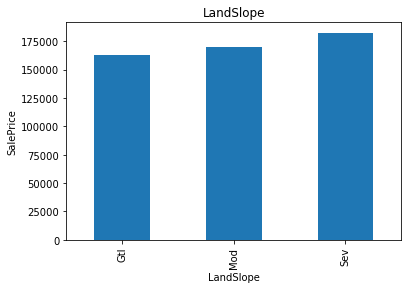

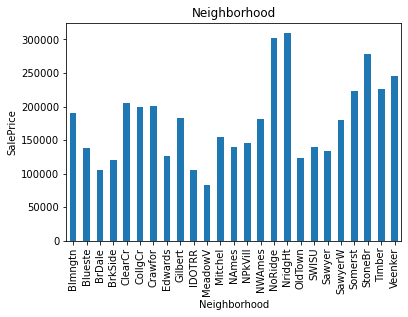

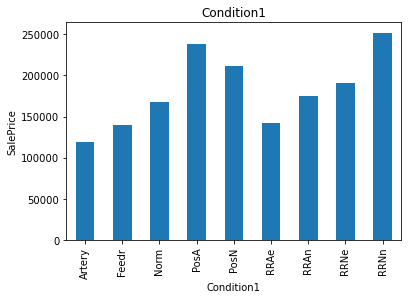

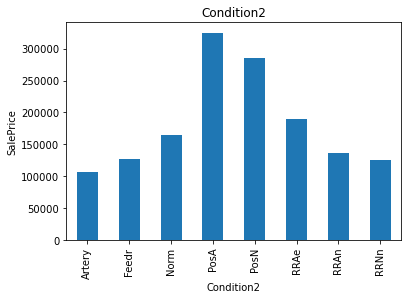

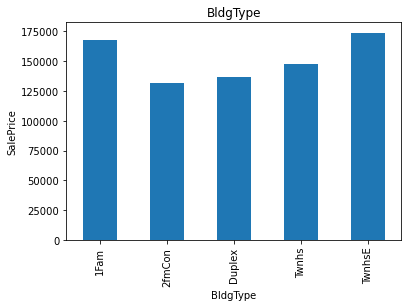

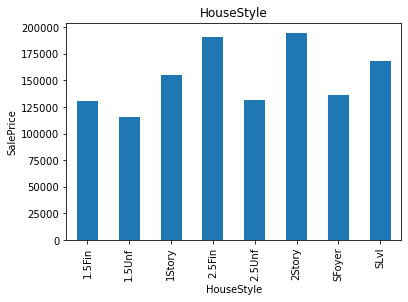

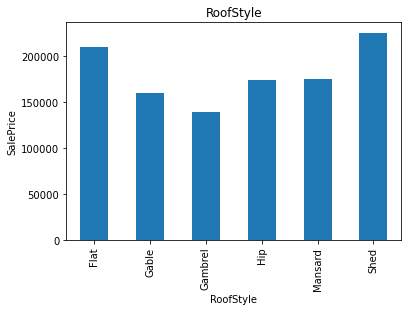

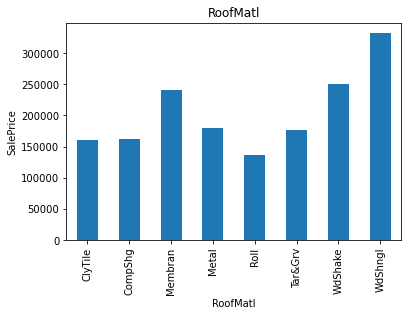

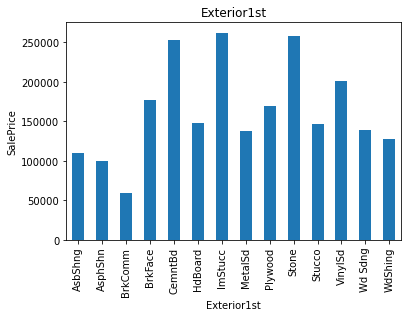

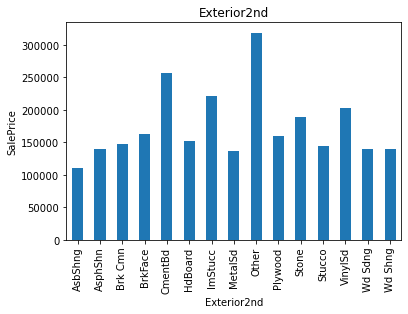

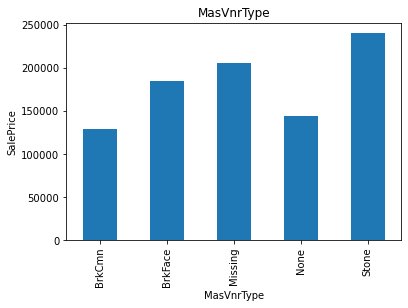

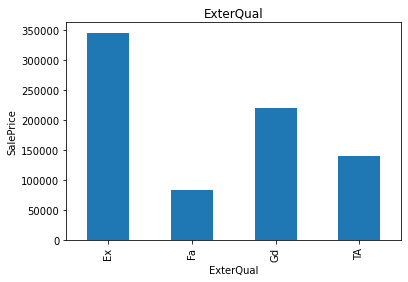

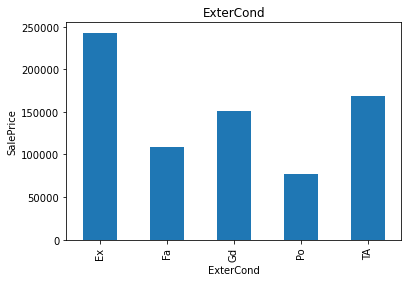

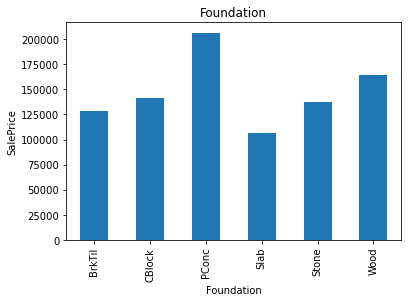

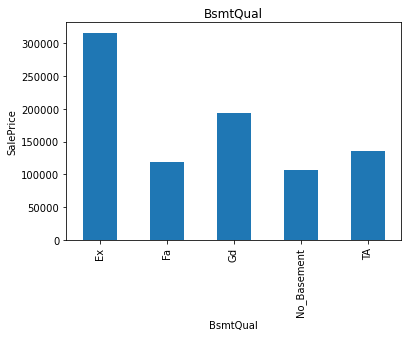

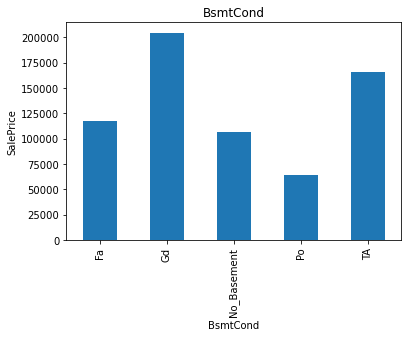

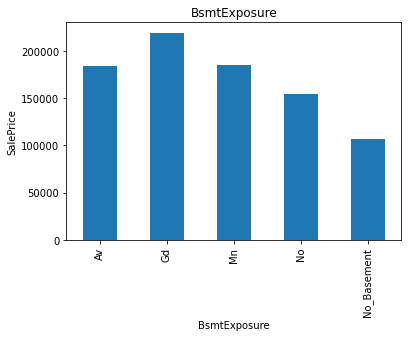

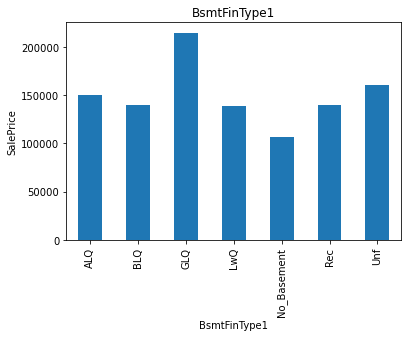

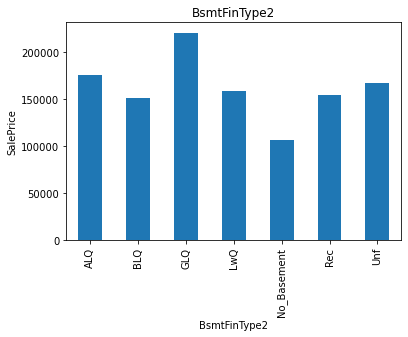

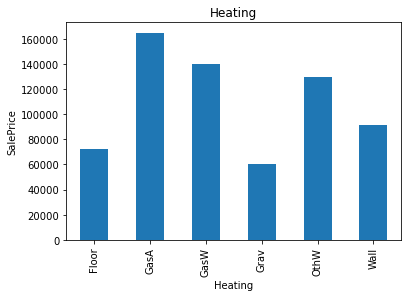

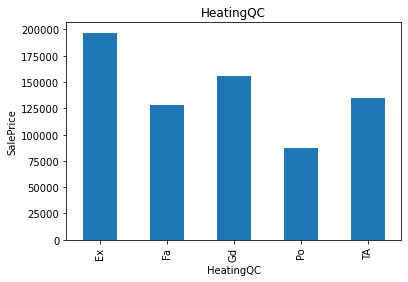

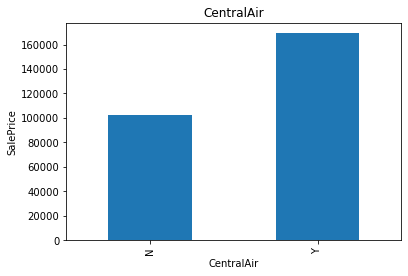

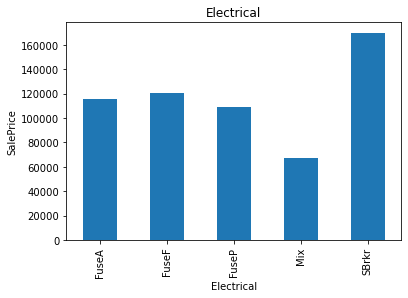

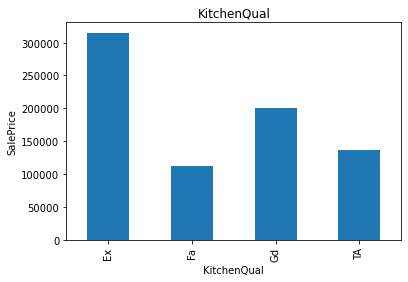

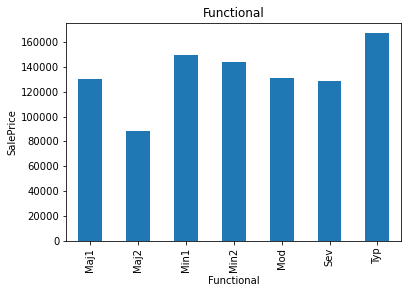

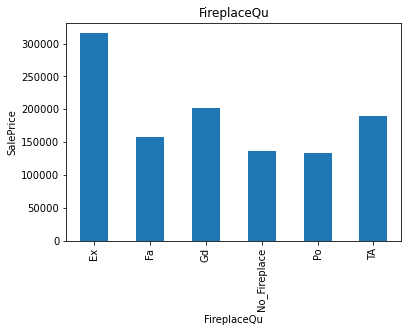

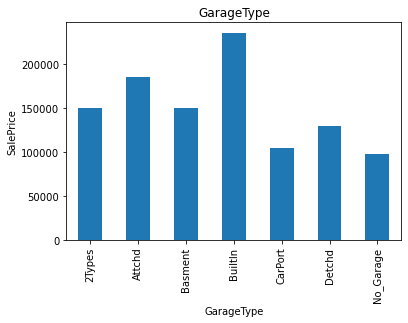

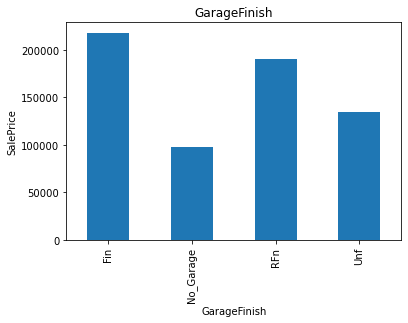

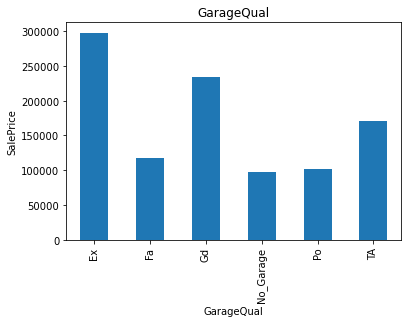

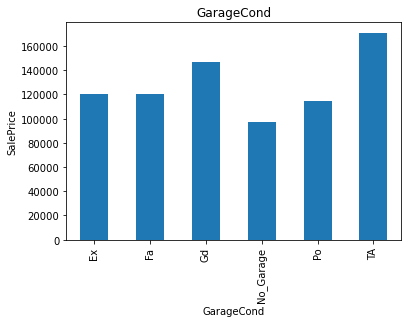

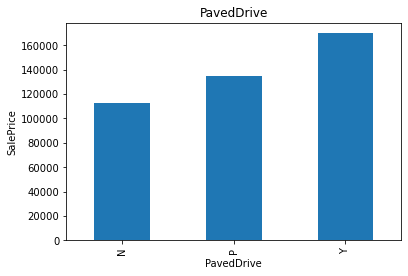

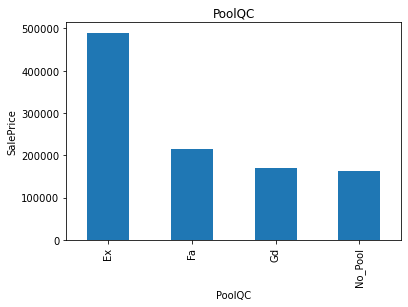

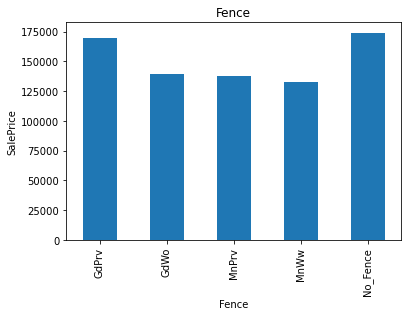

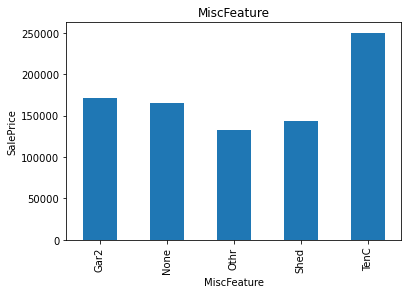

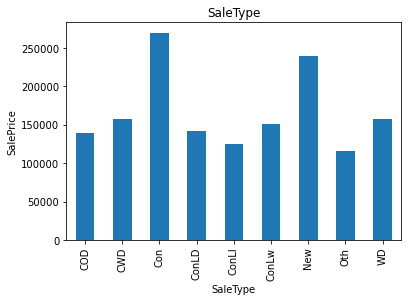

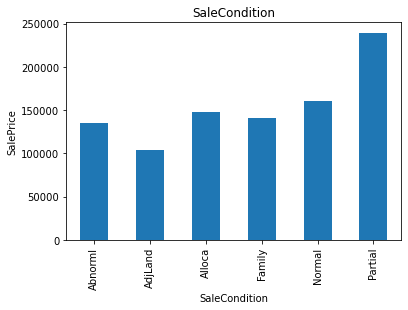

In [29]:
# Categorical variables vs SalesPrice
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

#### Feature Engineering 

In [30]:
# I've already treated all Null Values in Categorical Features, Now I wil check for numerical variables

numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']

# I am displaying the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}".format(feature,np.around(df[feature].isnull().mean(),4)))

LotFrontage: 0.1832
MasVnrArea: 0.006
GarageYrBlt: 0.0548


In [31]:
for feature in numerical_with_nan:
    median_value=df[feature].median()
    df[feature].fillna(median_value,inplace=True)

df[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

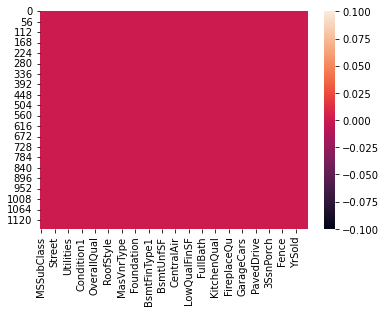

In [32]:
sns.heatmap(df.isnull())
plt.show()

In [33]:
years=['YearBuilt','YearRemodAdd','GarageYrBlt']
for feature in years:
    df[feature]=df['YrSold']-df[feature]

In [34]:
df[years].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,31,31,30.0
1,37,37,37.0
2,11,10,10.0
3,33,33,33.0
4,32,9,32.0


#### Handling Rare Categorical Feature

We will remove categorical variables that are present less than 1 % of the observations

In [35]:
for feature in categorical_features:
    temp=df.groupby(feature)['SalePrice'].count()/len(df)
    temp_df=temp[temp>0.01].index
    df[feature]=np.where(df[feature].isin(temp_df),df[feature],'Rare_var')

#### Label Encoding the categorical Features for Machine to understand

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_features:
    df[i]=le.fit_transform(df[i])

In [37]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,2,70.0,4928,0,1,0,3,0,3,0,14,2,0,4,2,6,5,31,31,1,0,5,5,2,0.0,3,3,1,2,4,3,0,120,6,0,958,1078,0,4,1,3,958,0,0,958,0,0,2,0,2,1,3,5,4,1,5,0,30.0,2,2,440,3,3,2,0,205,0,0,0,0,0,3,0,0,2,2007,3,3,128000
1,20,2,95.0,15865,0,1,0,3,0,3,1,9,2,0,0,2,8,6,37,37,0,1,9,9,2,0.0,1,1,2,4,1,1,0,351,5,823,1043,2217,0,0,1,3,2217,0,0,2217,1,0,2,0,4,1,2,8,4,1,5,0,37.0,3,2,621,3,3,2,81,207,0,0,224,0,0,3,0,0,10,2007,3,3,268000
2,60,2,92.0,9920,0,1,0,3,0,1,0,11,2,0,0,3,7,5,11,10,1,0,4,4,2,0.0,1,3,2,2,4,0,2,862,6,0,255,1117,0,0,1,3,1127,886,0,2013,1,0,2,1,3,1,3,8,4,1,5,0,10.0,3,2,455,3,3,2,180,130,0,0,0,0,0,3,0,0,6,2007,3,3,269790
3,20,2,105.0,11751,0,1,0,3,0,3,0,10,2,0,0,2,6,6,33,33,2,0,5,5,1,480.0,3,3,1,2,4,3,1,705,6,0,1139,1844,0,0,1,3,1844,0,0,1844,0,0,2,0,3,1,3,7,4,1,5,0,33.0,2,2,546,3,3,2,0,122,0,0,0,0,0,2,0,0,1,2010,0,3,190000
4,20,2,70.0,16635,0,1,0,3,0,2,0,10,2,0,0,2,6,7,32,9,1,0,2,2,4,126.0,1,3,1,2,4,3,0,1246,6,0,356,1602,0,2,1,3,1602,0,0,1602,0,1,2,0,3,1,2,8,4,1,5,0,32.0,0,2,529,3,3,2,240,0,0,0,0,0,0,3,0,0,6,2009,3,3,215000


In [38]:
df.shape

(1168, 80)

#### Skewness in some Continuous Variables

array([[<AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>],
       [<AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'GarageArea'}>,
        <AxesSubplot:title={'center':'WoodDeckSF'}>],
       [<AxesSubplot:title={'center':'OpenPorchSF'}>,
        <AxesSubplot:title={'center':'EnclosedPorch'}>,
        <AxesSubplot:title={'center':'ScreenPorch'}>,
        <AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

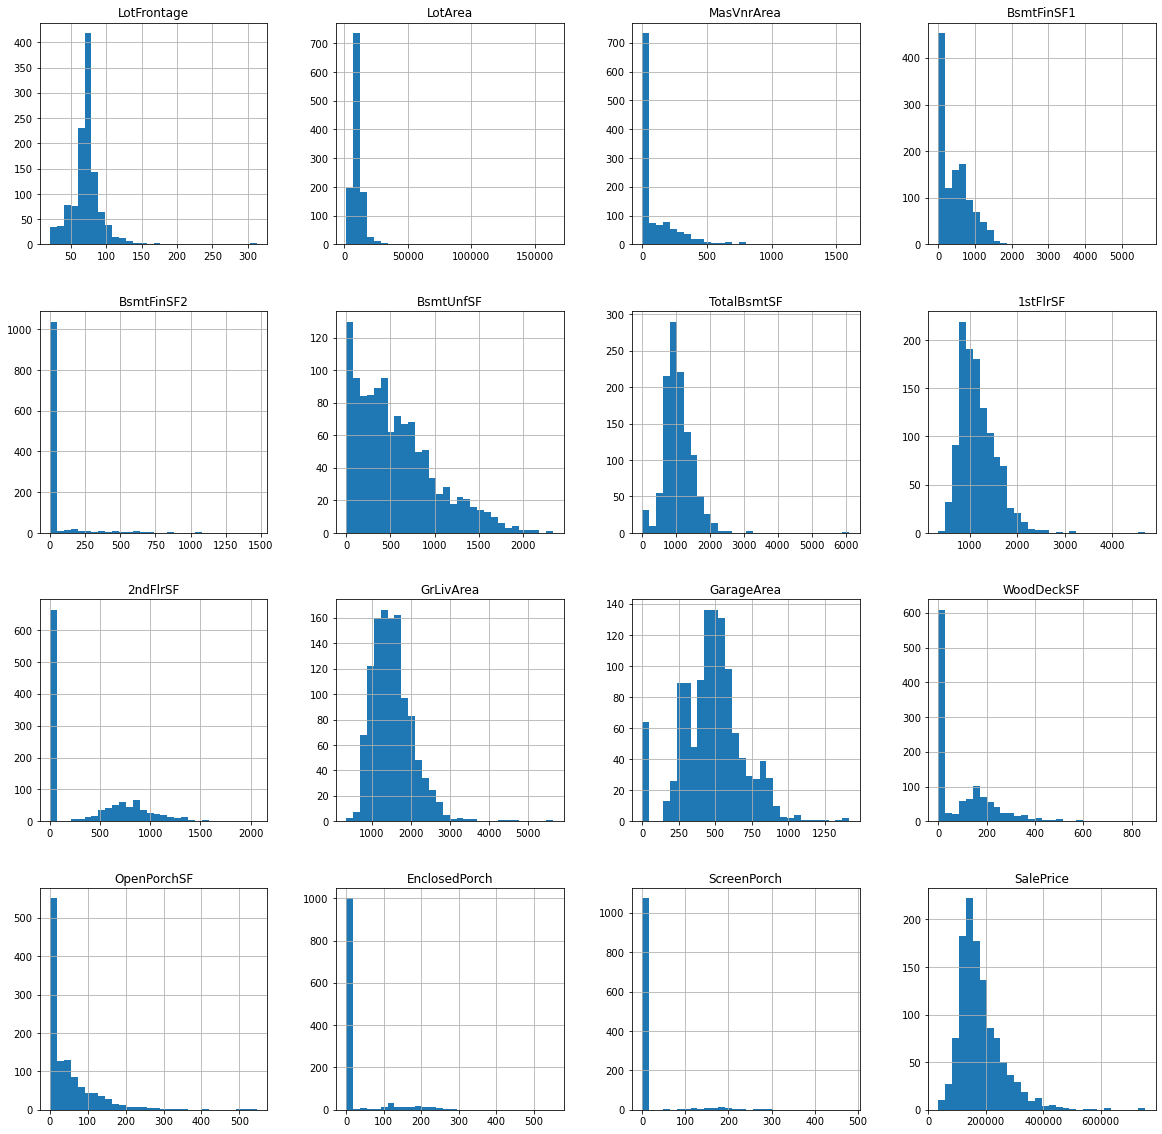

In [39]:
df[continuous_feature].hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

In [40]:
print(df[continuous_feature].skew())

LotFrontage       2.733440
LotArea          10.659285
MasVnrArea        2.835718
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
GrLivArea         1.449952
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
ScreenPorch       4.105741
SalePrice         1.953878
dtype: float64


#### Before Treating Skewness, Splitting into train and test set to avoid data leakage.

In [41]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,train_size=0.8,test_size=0.2,random_state=42)

In [42]:
df_train.shape

(934, 80)

In [43]:
df_test.shape

(234, 80)

In [44]:
for col in df_train[continuous_feature].columns:
    if df_train.skew().loc[col]>0.55 and col!='SalePrice':
        df_train[col]=np.log1p(df_train[col])
        
df_train[continuous_feature].skew()

LotFrontage     -0.655748
LotArea         -0.185212
MasVnrArea       0.510966
BsmtFinSF1      -0.629766
BsmtFinSF2       2.396963
BsmtUnfSF       -2.058791
TotalBsmtSF     -5.067725
1stFlrSF         0.126636
2ndFlrSF         0.332719
GrLivArea       -0.083234
GarageArea       0.185573
WoodDeckSF       0.090014
OpenPorchSF     -0.027285
EnclosedPorch    2.061462
ScreenPorch      3.156489
SalePrice        1.821812
dtype: float64

In [45]:
for col in df_test[continuous_feature].columns:
    if df_test.skew().loc[col]>0.55 and col!='SalePrice':
        df_test[col]=np.log1p(df_test[col])
        
df_test[continuous_feature].skew()

LotFrontage     -1.283353
LotArea         -0.100398
MasVnrArea       0.552181
BsmtFinSF1      -0.520672
BsmtFinSF2       3.049339
BsmtUnfSF       -2.470908
TotalBsmtSF     -5.529997
1stFlrSF         0.038920
2ndFlrSF         0.120458
GrLivArea        0.301868
GarageArea       0.215144
WoodDeckSF       0.298491
OpenPorchSF      0.087457
EnclosedPorch    2.168257
ScreenPorch      2.927073
SalePrice        2.387990
dtype: float64

array([[<AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>],
       [<AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'GarageArea'}>,
        <AxesSubplot:title={'center':'WoodDeckSF'}>],
       [<AxesSubplot:title={'center':'OpenPorchSF'}>,
        <AxesSubplot:title={'center':'EnclosedPorch'}>,
        <AxesSubplot:title={'center':'ScreenPorch'}>,
        <AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

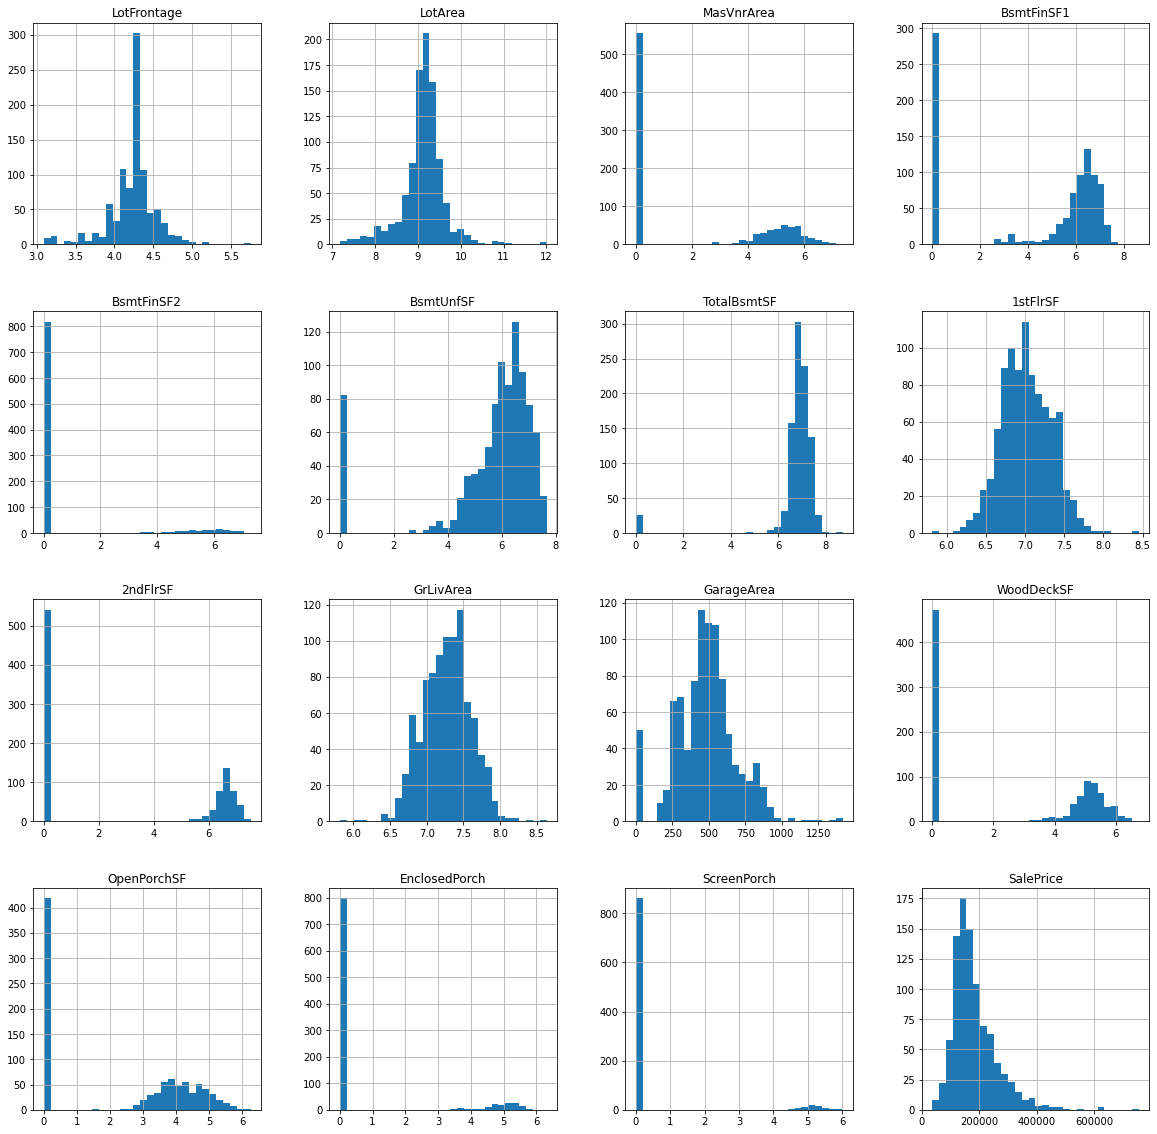

In [46]:
df_train[continuous_feature].hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

#### Scaling the dataset

In [47]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [48]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [49]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=df_train.columns)
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-0.890162,-0.090133,0.101692,0.781919,-0.056766,-0.017188,0.748888,0.303664,0.0,0.575096,-0.224986,-1.390055,0.02882,-0.114084,-0.407359,-0.292090,-0.067390,1.249618,0.392497,0.497847,-2.581889,-0.147925,-1.887365,-0.415215,0.210488,-0.805391,0.770652,0.384689,-0.565996,-0.576137,0.342397,-1.084963,-0.953231,0.609923,-4.397624,3.304744,-0.546576,0.537524,-0.129323,0.245487,0.262011,0.273555,0.362049,-0.851900,-0.128843,-0.424937,1.084030,-0.241003,-1.025327,-0.764774,-2.319797,-0.209696,0.805891,-1.626867,0.256388,0.601889,-0.951928,-0.781630,0.809315,0.113703,0.283191,0.406039,0.319533,0.292090,0.272356,1.328684,-1.075738,-0.411394,-0.118306,-0.29235,-0.064624,-0.065583,0.417693,-0.200991,-0.08926,-1.235688,0.141738,0.368170,0.157040
1,3.254098,-0.090133,0.101692,-0.543505,-0.056766,-0.017188,0.748888,0.303664,0.0,0.575096,-0.224986,-0.833477,0.02882,-0.114084,0.423368,0.515046,-0.782639,1.249618,2.078134,-0.280133,-0.449719,-0.147925,-0.751541,-0.806943,0.210488,-0.805391,0.770652,0.384689,-0.565996,-0.576137,0.342397,-1.084963,-0.506509,0.883434,0.357206,-0.371439,-0.306924,0.230346,-0.129323,1.389052,0.262011,0.273555,-0.981953,1.058978,-0.128843,-0.202678,1.084030,-0.241003,-1.025327,-0.764774,0.150774,-0.209696,0.805891,-0.986001,0.256388,-0.968402,-0.108379,1.821016,-0.036921,-0.722504,-2.415792,-2.270785,-2.550119,-2.936455,-3.932282,0.730040,-1.075738,2.437513,-0.118306,-0.29235,-0.064624,-0.065583,0.417693,-0.200991,-0.08926,-1.983425,0.141738,0.368170,0.157040
2,0.084958,-0.090133,1.220100,0.560800,-0.056766,-0.017188,-1.381452,0.303664,0.0,0.575096,-0.224986,0.465206,0.02882,-0.114084,-0.407359,0.515046,1.363110,-0.532280,-1.124576,-0.960866,-0.449719,-0.147925,0.762891,0.759969,-1.033789,1.482557,-1.169480,0.384689,0.768954,-2.149565,0.342397,-1.930836,-0.506509,0.883781,0.357206,-0.371439,-0.247591,0.244712,-0.129323,-0.898078,0.262011,0.273555,0.053215,1.341259,-0.128843,1.637868,1.084030,-0.241003,0.795311,1.219390,1.386059,-0.209696,-0.394591,2.218331,0.256388,0.601889,-0.951928,0.519693,-1.094716,-1.558712,1.632682,1.867850,0.319533,0.292090,0.272356,1.023652,1.270372,-0.411394,-0.118306,-0.29235,-0.064624,-0.065583,0.417693,-0.200991,-0.08926,-0.114082,-0.610441,0.368170,0.157040
3,-0.890162,-0.090133,0.912127,0.871823,-0.056766,-0.017188,-1.381452,0.303664,0.0,0.575096,-0.224986,-1.019003,0.02882,-0.114084,-0.407359,-0.292090,-0.067390,1.249618,0.459922,-1.009490,-0.449719,-0.147925,0.005675,-0.023487,0.210488,-0.805391,0.770652,0.384689,0.768954,0.997290,0.342397,0.606783,-1.399954,0.485507,-2.812680,2.947228,-0.078811,0.196118,-0.129323,-0.898078,0.262011,0.273555,1.534758,-0.851900,-0.128843,0.696956,-0.815565,-0.241003,-1.025327,-0.764774,-1.084512,-0.209696,-2.795554,-0.345135,0.256388,0.601889,-0.951928,-0.781630,0.893939,-1.558712,0.283191,-0.040098,0.319533,0.292090,0.272356,-0.977318,-1.075738,2.798703,-0.118306,-0.29235,-0.064624,-0.065583,0.417693,-0.200991,-0.08926,0.259787,-1.362621,0.368170,-3.391558
4,-0.890162,-0.090133,-0.237258,0.315080,-0.056766,-0.017188,0.748888,0.303664,0.0,0.575096,-0.224986,-0.276899,0.02882,-0.114084,-0.407359,-0.292090,-0.782639,-0.5322

In [50]:
X_test=sc.fit_transform(X_test)
X_test=pd.DataFrame(X_test,columns=df_test.columns)
X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.372623,-0.077152,-2.078525,-0.935171,-0.065512,0.136223,-1.340603,0.374977,0.0,0.652305,-0.230879,0.462829,0.035065,-0.092848,2.389911,-0.293049,-0.107303,-0.522054,-1.088978,-0.936632,-0.472225,-0.131876,0.805347,0.743514,2.417268,1.057370,-1.149282,0.308593,0.924229,-0.547014,0.316008,-2.103622,-1.424048,0.879590,0.315723,-0.303894,0.137780,0.383764,-0.177443,-0.895704,0.288675,0.380891,0.555171,-0.947236,-0.11088,-0.321226,1.178326,-0.211289,0.784524,-0.791735,-2.260432,-0.211289,-0.395893,-0.896958,0.257577,0.542189,-0.856078,-0.835480,-1.063858,0.022283,0.365787,0.672107,0.323462,0.346666,0.362471,1.124753,0.894312,-0.396074,-0.15743,-0.312846,-0.113447,-0.113961,0.396334,-0.172477,-0.134829,0.551268,0.920609,0.484918,0.195532
1,-0.833378,-0.077152,0.354846,0.108948,-0.065512,0.136223,0.764773,0.374977,0.0,-1.684012,-0.230879,-0.133329,0.035065,-0.092848,-0.387767,-0.293049,-0.107303,1.248389,0.344876,1.198008,1.829872,-0.131876,-0.658352,-0.775982,-1.067172,1.057370,0.799500,-2.831004,-0.480119,1.023553,0.316008,0.561978,-0.989025,0.731467,0.315723,-0.303894,0.272342,0.204847,-0.177443,0.249622,0.288675,0.380891,-0.032629,-0.947236,-0.11088,-0.878906,-0.819705,-0.211289,-0.997793,-0.791735,0.106195,-0.211289,0.807211,-0.896958,0.257577,-0.883342,0.046274,-0.835480,0.679917,0.891313,-0.951045,-0.799290,0.323462,0.346666,0.362471,-0.878043,-1.007695,-0.396074,-0.15743,2.904167,-0.113447,-0.113961,0.396334,-0.172477,-0.134829,-0.183756,0.167384,0.484918,0.195532
2,-0.612778,1.427306,-0.897036,-0.032946,-0.065512,-3.405575,0.764773,0.374977,0.0,0.652305,-0.230879,-0.530767,0.035065,-0.092848,-0.387767,-0.293049,-1.584298,0.363168,0.968291,1.476440,-0.472225,-0.131876,1.171272,1.123388,0.094308,-0.784688,0.799500,0.308593,-1.884467,1.023553,0.316008,0.561978,-1.424048,0.506937,0.315723,-0.303894,0.429885,0.085086,-0.177443,-0.895704,-3.464102,0.380891,-0.426079,-0.947236,-0.11088,-1.252195,-0.819705,-0.211289,-0.997793,-0.791735,-1.077118,-0.211289,0.807211,-0.321922,0.257577,-0.883342,0.046274,1.139291,1.438080,0.891313,-0.951045,-0.628503,0.323462,0.346666,0.362471,-0.878043,0.532291,-0.396074,-0.15743,-0.312846,-0.113447,-0.113961,0.396334,-0.172477,-0.134829,-0.918780,-1.339068,0.484918,-2.854768
3,0.049022,-0.077152,-0.087898,-0.119105,-0.065512,0.136223,-1.340603,0.374977,0.0,0.652305,-0.230879,1.456424,0.035065,-0.092848,-0.387767,0.495152,-0.107303,-0.522054,-1.088978,-0.936632,-0.472225,-0.131876,0.805347,0.743514,0.094308,-0.784688,-1.149282,0.308593,0.924229,-0.547014,0.316008,0.561978,1.186087,-1.329835,0.315723,-0.303894,0.536663,-0.080031,-0.177443,-0.895704,0.288675,0.380891,-0.968540,1.074867,-0.11088,0.347268,-0.819705,-0.211289,0.784524,1.179180,0.106195,-0.211289,-0.395893,-0.321922,0.257577,-0.883342,0.046274,-0.835480,-1.063858,0.022283,0.365787,0.216675,0.323462,0.346666,0.362471,1.044048,0.743281,-0.396074,-0.15743,-0.312846,-0.113447,-0.113961,0.396334,-0.172477,-0.134829,2.021315,0.167384,0.484918,0.195532
4,0.269622,1.427306,-0.335133,-1.678391,-0.065512,-3.405575,0.764773,0.374977,0.0,0.652305,-0.230879,0.661548,0.035065,-0.092848,-0.387767,0.495152,-0.107303,1.248389,

#### Modelling 
#### 1. Random Forest Regressor with PCA
#### Selecting and reducing to Optimum Features with PCA

In [51]:
x=X_train.copy()
from sklearn.decomposition import PCA
for i in range(30,79):
    pca = PCA(n_components=i)
    x_pca = pca.fit_transform(x)
    print(i, " variance :{}" .format(np.sum(pca.explained_variance_ratio_)))

30  variance :0.7373440348483923
31  variance :0.7484156379594105
32  variance :0.7599587437391401
33  variance :0.7702237863038153
34  variance :0.7800933663216185
35  variance :0.7905978844900282
36  variance :0.8004136614805418
37  variance :0.810067607582946
38  variance :0.8192566445862969
39  variance :0.828273417454524
40  variance :0.8370985316257314
41  variance :0.8454929862240423
42  variance :0.8542014182921892
43  variance :0.862086904563315
44  variance :0.8698970488690162
45  variance :0.8776211308294715
46  variance :0.8847840966464958
47  variance :0.8918086923038213
48  variance :0.8985868151348331
49  variance :0.9052033406363483
50  variance :0.9115637039112008
51  variance :0.9175823612990734
52  variance :0.9236560669175875
53  variance :0.9292943765768672
54  variance :0.9348405617775309
55  variance :0.9402042912755841
56  variance :0.945271302871082
57  variance :0.949966899619991
58  variance :0.9545103546375474
59  variance :0.9585985361410997
60  variance :0

#### Selecting 70 features, as it explains 99% of data

In [52]:
pca = PCA(n_components=70)
x=pca.fit_transform(x)
x_t=X_test.copy()
x_t=pca.fit_transform(x_t)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
parameters={'bootstrap':[True,False],
  'max_depth' :[10,20,30,40,50,60,70,80,90,100,None],
  'max_features': ['auto', 'sqrt'],
  'min_samples_leaf': [1,2,4],
  'min_samples_split': [2,5,10],
  'n_estimators': [200,400,600,800,1000,1200,1400,1600,1800,2000]}
rfr=RandomForestRegressor()
rand = RandomizedSearchCV(estimator = rfr, param_distributions = parameters,
                         n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1,scoring='r2')
rand.fit(x,y_train)
rand.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
rfr=RandomForestRegressor(n_estimators =1800,
                         min_samples_split= 5,
                         min_samples_leaf= 4,
                         max_features= 'auto',
                         max_depth= 80,
                         bootstrap= True)

In [ ]:
rfr.fit(x,y_train)
y_pred = rfr.predict(x_t)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

In [ ]:
feats = {}
for feature, importance in zip(data.columns, rfr.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient= 'index').rename(columns={0: 'Gini-Importance'}).head(10)
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize = 25, weight = 'bold')
plt.title('Features Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

#### 2, XGBoost Regressor with PCA

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBRegressor

In [ ]:
params = {
         'min_child_weight' : [1,5,10],
         'gamma' : [0.5, 1, 1.5, 2, 5],
         'subsample' ; [0.6, 0.8, 1.0],
         'colsample_bytree': [0.6, 0.8, 1.0],
         'max_depth' : [3,4,5]
         }

In [ ]:
xg = XGBRegressor(learning_rate=0.02, n_estimators=600,
                    silent=True, nthread=1)

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xg, param_distributions=params, n_inter=5, scoring='r2',
                                  n_jobs=4, cv=skf.split(x,y_train), verbose=3, random_state=1001)

In [ ]:
random_search.fit(x,y_train)
random_search.best_params_

In [ ]:
xg = XGBRegressor(learning_rate=0.02, n_estimators=600,
                    silent=True, nthread=1, subsample = 0.8,
                    min_child_weight=1, max_depth = 4, gamma = 1,
                    colsample_bytree = 1.0)

In [ ]:
xg.fit(x,y_train)
y_pred = xg.predict(x_t)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test, y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

#### 3. Linear Regression with RFE

a. Lasso
b. Ridge

In [ ]:
# Eliminate features at a step 0.05*n_features
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
def feature_RFE(model,train_data,y_data):
    support = []
    n_features = []
    scores = []
    rfecv = RFECV(estimator=model, step=0.05, cv=KFold(5,random_state=0,shuffle=True))
    rfecv.fit(train_data, y_train)
    return rfecv

In [ ]:
# Now we run RFE for Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
rfecv = feature_RFE(lm,X_train,y_train)

In [ ]:
print("Optimal RFE number of features : %d" % rfecv.n_features_)
print("Feature Ranking: ")
print(rfecv.ranking_)

In [ ]:
from sklearn.feature_selection import RFE
lm.fit(X_train,y_train)
rfe = RFE(lm,49)
rfe.fit(X_train,y_train)

In [ ]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']
rfe_sel_columns = list(rfe_scores[rfe_scores.status==True].Column_Names)

#### Lets filter the train and test set for the RFE selected columns

In [ ]:
X_train_lm = X_train[rfe_sel_columns]
X_test_lm = X_test[rfe_sel_columns]

In [ ]:
X_train_lm.shape

#### 3 a) Lasso regression model with Grid search CV

In [ ]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score
from sklearn.metrics import r2_score

folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'aplha' : [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )
model_cv.fit(X_train_lm,y_train)

In [ ]:
model_cv.best_parmas_

In [ ]:
lasso = Lasso(alpha=20)
lasso.fit(X_train_lm,y_train)

y_train_pred = lasso.predict(X_train_lm)
y_test_pred = lasso.predict(X_test_lm)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

In [ ]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']

In [ ]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

#### 3 b) Now lets use the ridge regression

In [ ]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0,5.0,10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train_lm,y_train)


In [ ]:
model_cv.best_params_

In [ ]:
ridge = Ridge(alpha=20)
ridge.fit(X_train_lm,y_train)

y_train_pred = ridge.predict(X_train_lm)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test_lm)
print(r2_score(y_test,y_test_pred))

In [ ]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns= ['Feature','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

#### Final Model 

In [ ]:
lasso = Lasso(alpha=20)
lasso.fit(X_train_lm,y_train)

y_train_pred = lasso.predict(X_train_lm)
y_test_pred = lasso.predict(X_test_lm)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

In [ ]:
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))

#### Top 10 Features

In [ ]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols=df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']

In [ ]:
df_feature=lasso_coef
df_feature['Coef_Absolute']=df_feature['Coef'].abs()
df_feature['Colour']=''
for i in range(len(df_feature)):
    if df_feature['Coef'][i] < 0:
        df_feature['Colour'][i]='green'
    else:
        df_feature['Colour'][i]='blue'

In [ ]:
df_top =df_feature.sort_values('Coef_Absolute',ascending=False).head(10)
df_top

In [ ]:
plt.figure(figsize=(20,5))
colors = {'Positive':'blue', 'Negative':'green'}
labels = list(colors.keys())
plt.bar(df_top.Feature, df_top.Coef_Absolute, color = df_top.Colour, label=labels)
plt.xtricks(rotation=45)
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.title('Effect of Top 10 Features on Sales Price')

In [ ]:
plt.scatter(y_test,y_test_pred)

In [ ]:
import joblib
joblib.dump(lasso,'House_Price_Prediction.pkl')

#### END 